In [1]:
#pip install opencv-contrib-python

> # KCF 추적

In [8]:
import cv2, sys

# 카메라 장치 열기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed!')
    sys.exit()
    
# 트래커 객체 생성
tracker = cv2.TrackerKCF_create()
#tracker = cv2.TrackerMOSSE_create()
#cv2.legacy.TrackerTLD_create()
#tracker = cv2.TrackerCSRT_create()

#GOTURN
#import os
#if (os.path.isfile('goturn.caffemodel') and os.path.isfile('goturn.prototxt')):
# tracker = cv2.TrackerGOTURN_create()

# 첫 번째 프레임에서 추적 ROI 설정
ret, frame = cap.read()
if not ret:
    print('Frame read failed!')
    sys.exit()
# ROI를 선택하고 Enter키를 치면 추적 시작
bbox = cv2.selectROI(frame, False)
tracker.init(frame, bbox) # 객체 초기화

# 매 프레임 처리
while True:
    ret, frame = cap.read()
    if not ret:
        print('Frame read failed!'); sys.exit()
        
    # 추척 ROI 사각형(bbox) 업데이트
    # 매 프래임마다 update하고 bbox값 받아옴
    ret, bbox = tracker.update(frame)
    
    # floate 형태로 bbox값을 받으므로 int로 변환해서 list로 감싸고 tuple로 변환
    bbox = tuple([int(_) for _ in bbox])
    cv2.rectangle(frame, bbox, (0, 0, 255), 2)
    cv2.imshow('Tracking APIs', frame)
    if cv2.waitKey(20) == 27: 
        break # ESC 종료
        
cv2.destroyAllWindows()

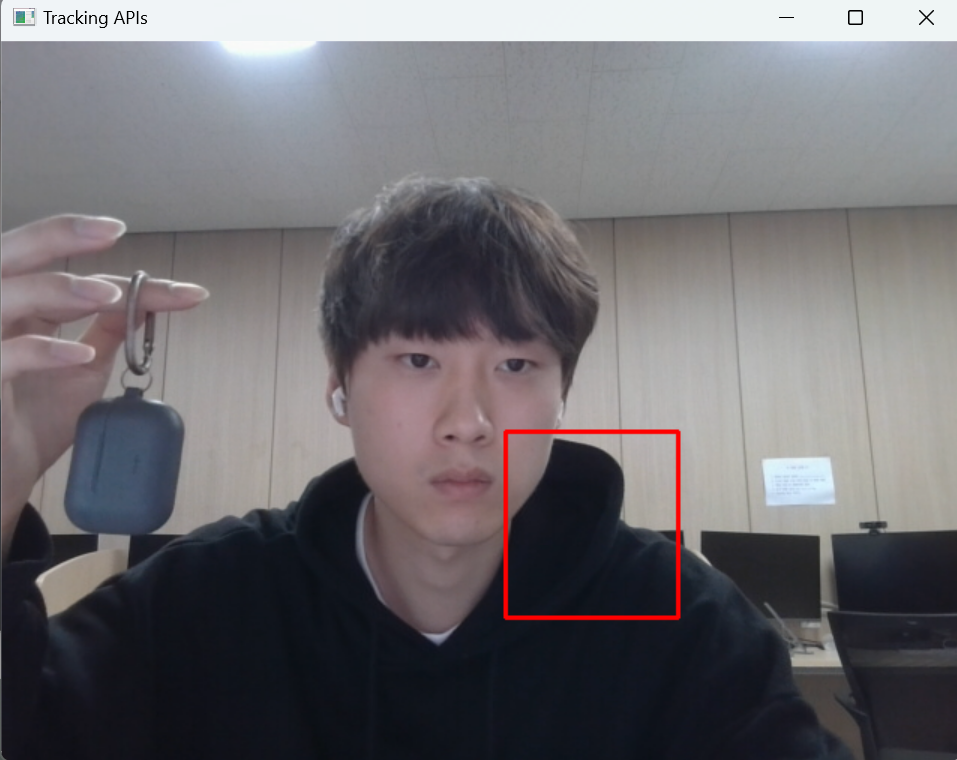

### - 객체가 원래 있던 위치에서 사각형이 잘 벗어나지 않음
### - 객체 추적하는 속도가 느림

> # MOSSE 추적

In [9]:
import cv2, sys

# 카메라 장치 열기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed!')
    sys.exit()
    
# 트래커 객체 생성
#tracker = cv2.TrackerKCF_create()
tracker = cv2.TrackerMOSSE_create()
#cv2.legacy.TrackerTLD_create()
#tracker = cv2.TrackerCSRT_create()

#GOTURN
#import os
#if (os.path.isfile('goturn.caffemodel') and os.path.isfile('goturn.prototxt')):
# tracker = cv2.TrackerGOTURN_create()

# 첫 번째 프레임에서 추적 ROI 설정
ret, frame = cap.read()
if not ret:
    print('Frame read failed!')
    sys.exit()
# ROI를 선택하고 Enter키를 치면 추적 시작
bbox = cv2.selectROI(frame, False)
tracker.init(frame, bbox) # 객체 초기화

# 매 프레임 처리
while True:
    ret, frame = cap.read()
    if not ret:
        print('Frame read failed!'); sys.exit()
        
    # 추척 ROI 사각형(bbox) 업데이트
    # 매 프래임마다 update하고 bbox값 받아옴
    ret, bbox = tracker.update(frame)
    
    # floate 형태로 bbox값을 받으므로 int로 변환해서 list로 감싸고 tuple로 변환
    bbox = tuple([int(_) for _ in bbox])
    cv2.rectangle(frame, bbox, (0, 0, 255), 2)
    cv2.imshow('Tracking APIs', frame)
    if cv2.waitKey(20) == 27: 
        break # ESC 종료
        
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'TrackerMOSSE_create'

### - cv2 모듈은 OpenCV 3.x 버전에서 사용되는 모듈이며, 'TrackerMOSSE_create()' 함수를 제공하지 않습니다. 
### - OpenCV 4.x 버전 이상에서는 cv2.legacy 모듈을 사용하여 MOSSE 추적 알고리즘에 접근할 수 있습니다.

In [13]:
import cv2
import sys

# 카메라 장치 열기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 트래커 객체 생성
tracker = cv2.legacy.TrackerMOSSE_create()

# 첫 번째 프레임에서 추적 ROI 설정
ret, frame = cap.read()
if not ret:
    print('Frame read failed!')
    sys.exit()

# ROI를 선택하고 Enter 키를 누르면 추적 시작
bbox = cv2.selectROI(frame, False)
tracker.init(frame, bbox)  # 객체 초기화

# 매 프레임 처리
while True:
    ret, frame = cap.read()
    if not ret:
        print('Frame read failed!')
        sys.exit()

    # 추적 ROI 사각형(bbox) 업데이트
    # 매 프래임마다 update하고 bbox값 받아옴
    success, bbox = tracker.update(frame)

    # 추적이 성공적으로 이루어졌을 때 사각형 그리기
    if success:
        (x, y, w, h) = [int(v) for v in bbox]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow('Tracking', frame)
    if cv2.waitKey(1) == 27:
        break

# 자원 해제
cap.release()
cv2.destroyAllWindows()


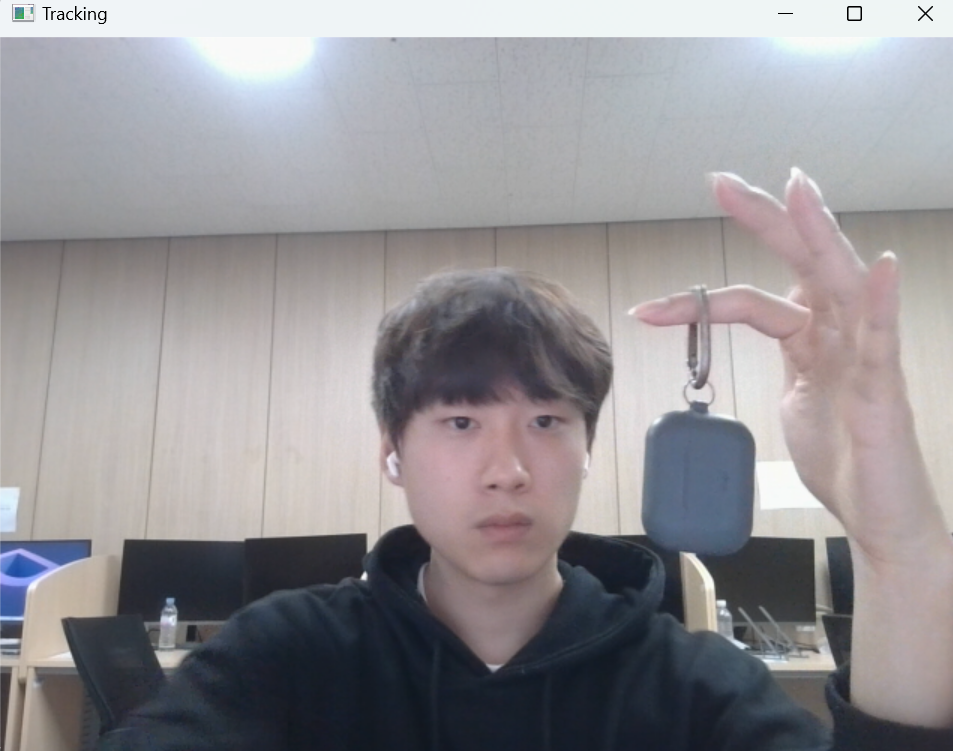

### - 객체를 잘 탐지하지 못함

> # TLD 추적

In [15]:
import cv2, sys

# 카메라 장치 열기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed!')
    sys.exit()
    
# 트래커 객체 생성
#tracker = cv2.TrackerKCF_create()
#tracker = cv2.TrackerMOSSE_create()
tracker = cv2.legacy.TrackerTLD_create()
#tracker = cv2.TrackerCSRT_create()

#GOTURN
#import os
#if (os.path.isfile('goturn.caffemodel') and os.path.isfile('goturn.prototxt')):
# tracker = cv2.TrackerGOTURN_create()

# 첫 번째 프레임에서 추적 ROI 설정
ret, frame = cap.read()
if not ret:
    print('Frame read failed!')
    sys.exit()
# ROI를 선택하고 Enter키를 치면 추적 시작
bbox = cv2.selectROI(frame, False)
tracker.init(frame, bbox) # 객체 초기화

# 매 프레임 처리
while True:
    ret, frame = cap.read()
    if not ret:
        print('Frame read failed!'); sys.exit()
        
    # 추척 ROI 사각형(bbox) 업데이트
    # 매 프래임마다 update하고 bbox값 받아옴
    ret, bbox = tracker.update(frame)
    
    # floate 형태로 bbox값을 받으므로 int로 변환해서 list로 감싸고 tuple로 변환
    bbox = tuple([int(_) for _ in bbox])
    cv2.rectangle(frame, bbox, (0, 0, 255), 2)
    cv2.imshow('Tracking APIs', frame)
    if cv2.waitKey(20) == 27: 
        break # ESC 종료
        
cv2.destroyAllWindows()

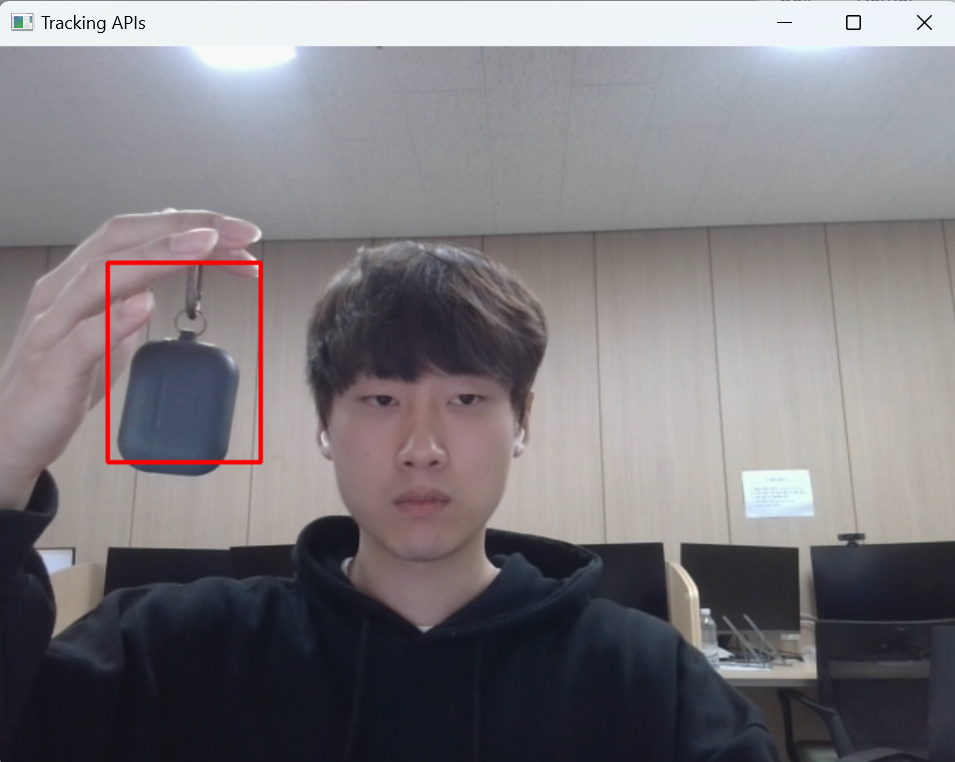

### - KCF와 MOSSE에 비해서는 추적을 잘하지만 여전히 다른 객체를 추적하는 경우가 많음
### - 추적하는 객체의 크기의 변경도 잦음
### - 지정한 객체와 비슷한 모양을 가진 경우 추적함

> # CSRT 추적

In [17]:
import cv2, sys

# 카메라 장치 열기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed!')
    sys.exit()
    
# 트래커 객체 생성
#tracker = cv2.TrackerKCF_create()
#tracker = cv2.TrackerMOSSE_create()
#cv2.legacy.TrackerTLD_create()
tracker = cv2.TrackerCSRT_create()

#GOTURN
#import os
#if (os.path.isfile('goturn.caffemodel') and os.path.isfile('goturn.prototxt')):
# tracker = cv2.TrackerGOTURN_create()

# 첫 번째 프레임에서 추적 ROI 설정
ret, frame = cap.read()
if not ret:
    print('Frame read failed!')
    sys.exit()
# ROI를 선택하고 Enter키를 치면 추적 시작
bbox = cv2.selectROI(frame, False)
tracker.init(frame, bbox) # 객체 초기화

# 매 프레임 처리
while True:
    ret, frame = cap.read()
    if not ret:
        print('Frame read failed!'); sys.exit()
        
    # 추척 ROI 사각형(bbox) 업데이트
    # 매 프래임마다 update하고 bbox값 받아옴
    ret, bbox = tracker.update(frame)
    
    # floate 형태로 bbox값을 받으므로 int로 변환해서 list로 감싸고 tuple로 변환
    bbox = tuple([int(_) for _ in bbox])
    cv2.rectangle(frame, bbox, (0, 0, 255), 2)
    cv2.imshow('Tracking APIs', frame)
    if cv2.waitKey(20) == 27: 
        break # ESC 종료
        
cv2.destroyAllWindows()

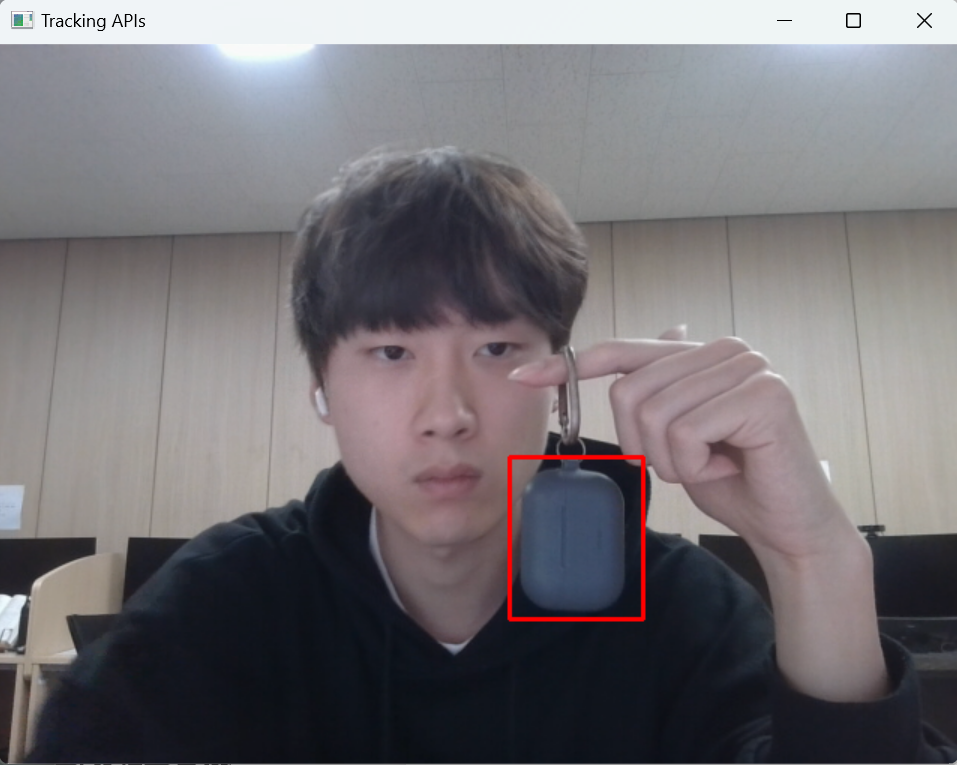

### - 준수하게 추적
### - 객체가 빠르게 움직이거나 화면 밖으로 나갈 시 다른 객체를 추적하거나 밀리는 현상 발생

> # KCF를 이용한 얼굴 추적

In [16]:
import cv2

# 얼굴 검출을 위한 Haar Cascade 분류기 초기화
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 추적 알고리즘 초기화
tracker = cv2.TrackerKCF_create()

# 카메라 캡처 객체 생성
cap = cv2.VideoCapture(0)

# 추적할 얼굴 위치 초기화
tracking_started = False
bbox = None

while True:
    # 프레임 읽기
    ret, frame = cap.read()

    # 프레임이 제대로 읽혔는지 확인
    if not ret:
        break

    # 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if not tracking_started:
        # 얼굴 검출
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # 얼굴이 검출되었을 때 추적 시작
        if len(faces) > 0:
            (x, y, w, h) = faces[0]
            bbox = (x, y, w, h)
            tracker.init(frame, bbox)
            tracking_started = True

    else:
        # 객체 추적
        success, bbox = tracker.update(frame)

        # 추적이 성공적으로 이루어졌을 때 얼굴 주위에 초록색 사각형 그리기
        if success:
            (x, y, w, h) = [int(v) for v in bbox]
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # 프레임 출력
    cv2.imshow('Face Tracking', frame)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 자원 해제
cap.release()
cv2.destroyAllWindows()


### - 성능 준수